In [1]:
data_path = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"

In [2]:
from Tool_Functions.cleaning_data import * 

from Clustering.new_data_set_all import * 
from Clustering.viualize_datas import * 
from Clustering.new_data_set_all import *

from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
def clean_new_df(data_path):
    df = file_to_dataframe(data_path + 'New_abos.csv')
    df = df.rename( columns= {'DAT_MVT_REELLE' : 'DATE_ACTE_REEL'})
    df['DATE_ACTE_REEL'] = pd.to_datetime(df['DATE_ACTE_REEL'])
    save_to_csv_file(df, data_path + 'new_abos.csv')
    return True
    

In [25]:
clean_new_df(data_path)

True

In [93]:
new = file_to_dataframe(data_path + "new_abos.csv")
new

,DATE_ACTE_REEL,ID_ABONNE
0,2023-11-01,50950213101
1,2023-11-01,50955287201
2,2023-11-01,50960236001
3,2023-11-01,50977036901
4,2023-11-01,50933674101
...,...,...
458816,2023-11-28,52058240301
458817,2023-11-10,50416372502
458818,2023-11-25,51943996401
458819,2023-11-23,52221512101


In [119]:
new = file_to_dataframe(data_path + "new_abos.csv")
cluster_id = file_to_dataframe(data_path + "Clustering_results/final_partiel/clusters_id_partiel.csv")
cluster_id_all = file_to_dataframe(data_path + "Clustering_results/final_total/clusters_id_all.csv")

,DATE_ACTE_REEL,ID_ABONNE
Cluster_8,,
0,3547,3547
1,1362,1362
2,6072,6072
3,7502,7502
4,1822,1822
5,6509,6509
6,5493,5493
7,7430,7430


In [135]:
cluster_centers_all = file_to_dataframe(data_path + "clusters_centers_all.csv")
cluster_centers_all

,KMEANS,POURCENTAGE_ID_ABONNE,Semaine genéreuse_n_REABOS,ODD 15 jours TC_n_REABOS,SCORE_FIDELITE,ANCIENNETE
0,0,13.712288,1.15,2.90,0.28,604.55
1,1,9.187035,6.83,3.68,0.52,971.93
2,2,13.866106,3.14,7.78,0.40,927.96
3,3,13.400427,10.20,8.76,0.60,947.41
4,4,16.295165,1.62,2.43,0.25,953.69
5,5,11.051414,4.65,4.89,0.60,459.68
6,6,11.745706,1.24,2.17,0.32,251.94
7,7,10.741858,16.91,9.60,0.76,999.36


In [136]:
cluster_centers_partiel = file_to_dataframe(data_path + "clusters_centers_partiel.csv")
cluster_centers_partiel

,KMEANS,POURCENTAGE_ID_ABONNE,ODD 15 jours TC_n_REABOS,Semaine genéreuse_n_REABOS,SCORE_FIDELITE,ANCIENNETE
0,0,13.446637,2.89,1.17,0.28,604.31
1,1,9.035720,3.75,7.25,0.53,974.95
2,2,14.016573,7.56,3.01,0.39,925.37
3,3,13.066253,8.98,9.77,0.59,947.99
4,4,16.040164,2.37,1.67,0.26,952.58
5,5,10.963255,4.90,4.70,0.60,461.23
6,6,11.958401,2.18,1.24,0.33,252.39
7,7,11.472995,9.51,16.72,0.75,995.66


In [120]:
df2 = join_dataFrames(new, cluster_id_all, 'ID_ABONNE')
df2.groupby(['KMEANS']).count()

,DATE_ACTE_REEL,ID_ABONNE
KMEANS,,
0,77557,77557
1,12503,12503
2,34150,34150
3,39503,39503
4,54126,54126
5,44802,44802
6,67873,67873
7,63386,63386


1 / graph pour lisibilité
2 / comparer avant et après ODD

In [66]:
def upload_new_df(data_path):
    df_original = file_to_dataframe(data_path + "df_Donnees_Reabos_odd_v2.csv")
    dfn = file_to_dataframe(data_path + 'New_abos.csv')
    df_test = join_dataFrames_outer(df_original,dfn, 'ID_ABONNE')
    df_test['DATE_ACTE_REEL_x'].fillna(df_test['DATE_ACTE_REEL_y'], inplace=True)
    df_test.drop(columns=['DATE_ACTE_REEL_y'], inplace=True)
    df_test = df_test.rename( columns= {'DATE_ACTE_REEL_x' : 'DATE_ACTE_REEL'})
    save_to_csv_file(df_test, data_path + 'all_reabos_nov.csv')
    return True

def upload_new_df_clusters_partiel(data_path):
    df_test = file_to_dataframe(data_path + 'all_reabos_nov.csv')
    df_id = file_to_dataframe(data_path + 'clusters_id_partiel.csv')
    df_merge = pd.merge(df_test, df_id, on='ID_ABONNE', how='left')
    df_merge['Cluster_8'].fillna('unclustered', inplace=True)
    save_to_csv_file(df_merge, data_path + 'all_reabos_nov_n_clusters.csv')
    return True

def upload_new_df_clusters_total(data_path):
    df_test = file_to_dataframe(data_path + 'all_reabos_nov.csv')
    df_id = file_to_dataframe(data_path + 'clusters_id_all.csv')
    df_merge = pd.merge(df_test, df_id, on='ID_ABONNE', how='left')
    df_merge['KMEANS'].fillna('unclustered', inplace=True)
    save_to_csv_file(df_merge, data_path + 'all_reabos_nov_n_clusters_total.csv')
    return True

In [3]:
dfn = file_to_dataframe(data_path + 'New_abos.csv')
odd = dfn[dfn['DATE_ACTE_REEL'] >= '2023-11-14']
sg = dfn[dfn['DATE_ACTE_REEL'] < '2023-11-14']
pile = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-14']
lejouravant = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-13']


In [4]:
df_repartition_promo = count_abo_conditions(dfn,['DATE_ACTE_REEL'],'ID_ABONNE')
df_repartition_promo

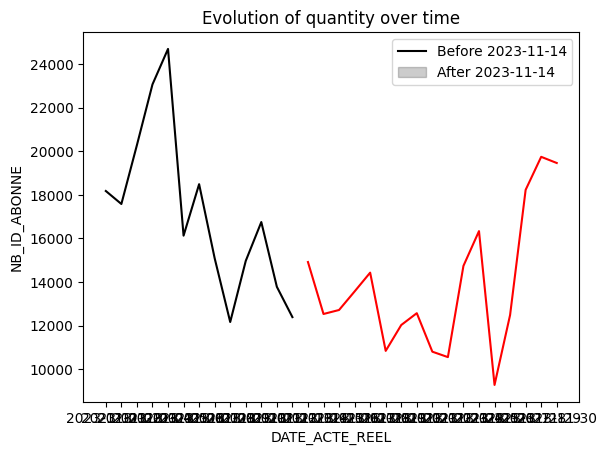

In [155]:
before_date = df_repartition_promo[df_repartition_promo['DATE_ACTE_REEL'] < '2023-11-14']
after_date = df_repartition_promo[df_repartition_promo['DATE_ACTE_REEL'] >= '2023-11-14']

sns.lineplot(x='DATE_ACTE_REEL', y='NB_ID_ABONNE', data=before_date.sort_values(by='DATE_ACTE_REEL'), color='black')
sns.lineplot(x='DATE_ACTE_REEL', y='NB_ID_ABONNE', data=after_date.sort_values(by='DATE_ACTE_REEL'), color='red')

plt.title('Evolution of quantity over time')
plt.xlabel('DATE_ACTE_REEL')
plt.ylabel('NB_ID_ABONNE')
plt.legend(['Before 2023-11-14', 'After 2023-11-14'])
plt.show()

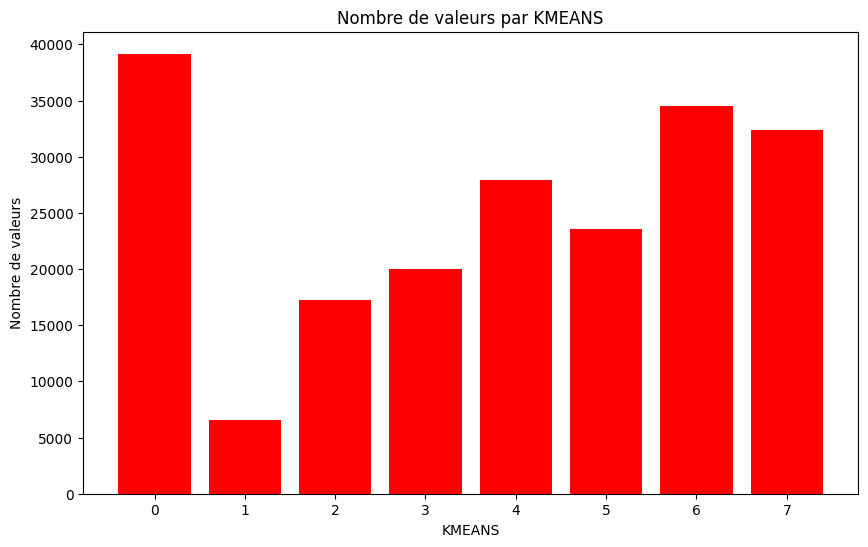

In [128]:
rep_odd = join_dataFrames(odd, cluster_id_all, 'ID_ABONNE')
liste = rep_odd.groupby(['KMEANS']).count()
donnees_odd = pd.DataFrame(liste)
donnees_odd['KMEANS'] = donnees_odd.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_odd['KMEANS'], donnees_odd['ID_ABONNE'], color='red')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_odd['KMEANS'])
plt.show()

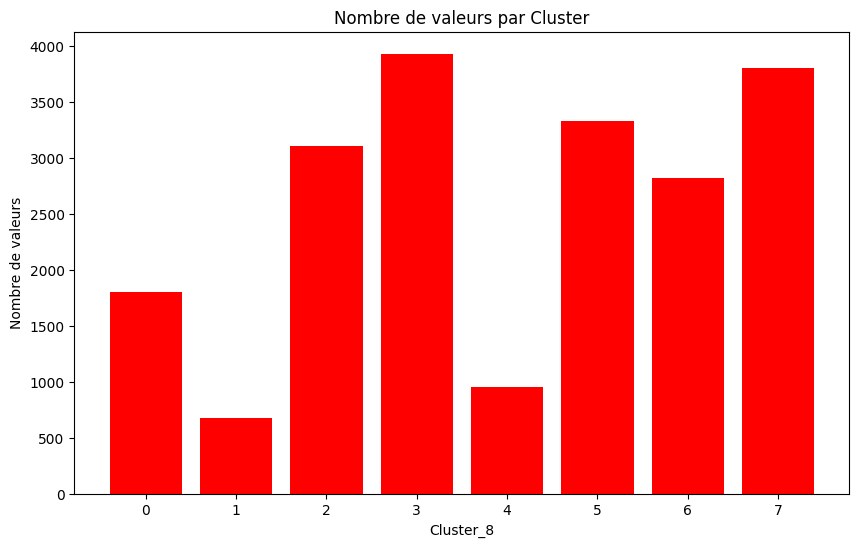

In [143]:
rep_odd_p = join_dataFrames(odd, cluster_id, 'ID_ABONNE')
liste = rep_odd_p.groupby(['Cluster_8']).count()
donnees_odd_p = pd.DataFrame(liste)
donnees_odd_p['Cluster_8'] = donnees_odd_p.index
plt.figure(figsize=(10, 6))
plt.bar(donnees_odd_p['Cluster_8'], donnees_odd_p['ID_ABONNE'], color='red')
plt.xlabel('Cluster_8')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par Cluster')
plt.xticks(donnees_odd_p['Cluster_8'])
plt.show()


In [125]:
rep_sg = join_dataFrames(sg, cluster_id_all, 'ID_ABONNE')
liste = rep_sg.groupby(['KMEANS']).count()
donnees_sg = pd.DataFrame(liste)
donnees_sg['KMEANS'] = donnees_sg.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_sg['KMEANS'], donnees_sg['ID_ABONNE'], color='skyblue')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_sg['KMEANS'])
plt.show()

,DATE_ACTE_REEL,ID_ABONNE,KMEANS
KMEANS,,,
0,38391,38391,0
1,5981,5981,1
2,16941,16941,2
3,19482,19482,3
4,26220,26220,4
5,21276,21276,5
6,33330,33330,6
7,31011,31011,7


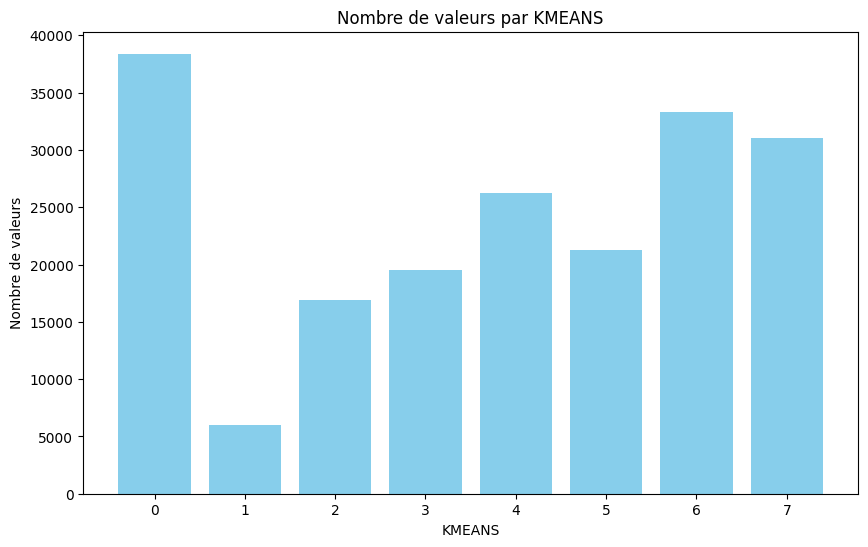

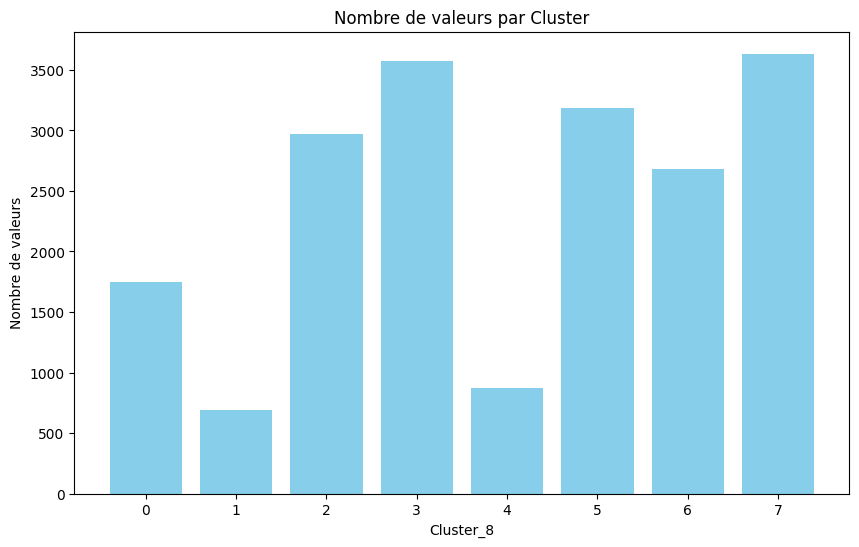

In [144]:
rep_sg_p = join_dataFrames(sg, cluster_id, 'ID_ABONNE')
liste = rep_sg_p.groupby(['Cluster_8']).count()
donnees_sg_p = pd.DataFrame(liste)
donnees_sg_p['Cluster_8'] = donnees_sg_p.index
plt.figure(figsize=(10, 6))
plt.bar(donnees_sg_p['Cluster_8'], donnees_sg_p['ID_ABONNE'], color='skyblue')
plt.xlabel('Cluster_8')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par Cluster')
plt.xticks(donnees_sg_p['Cluster_8'])
plt.show()


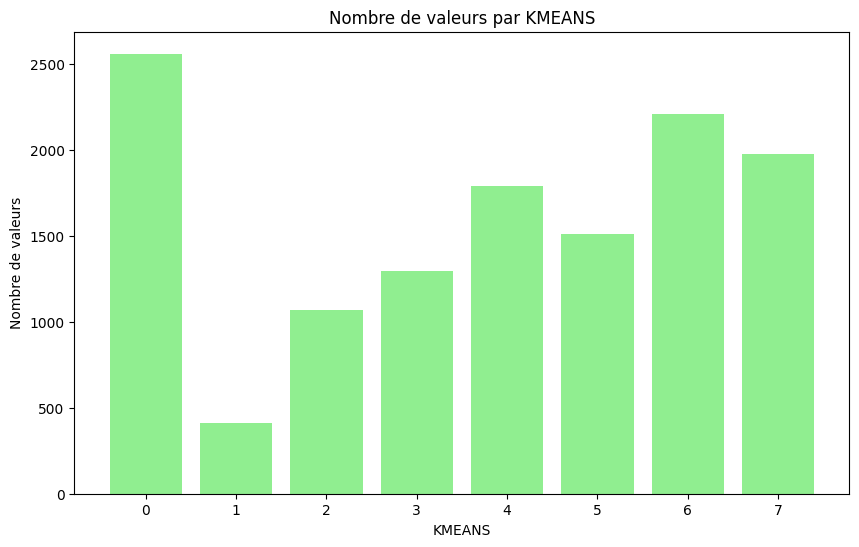

In [130]:
rep_pile = join_dataFrames(pile, cluster_id_all, 'ID_ABONNE')
liste = rep_pile.groupby(['KMEANS']).count()
donnees_pile = pd.DataFrame(liste)
donnees_pile['KMEANS'] = donnees_pile.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_pile['KMEANS'], donnees_pile['ID_ABONNE'], color='lightgreen')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_pile['KMEANS'])
plt.show()

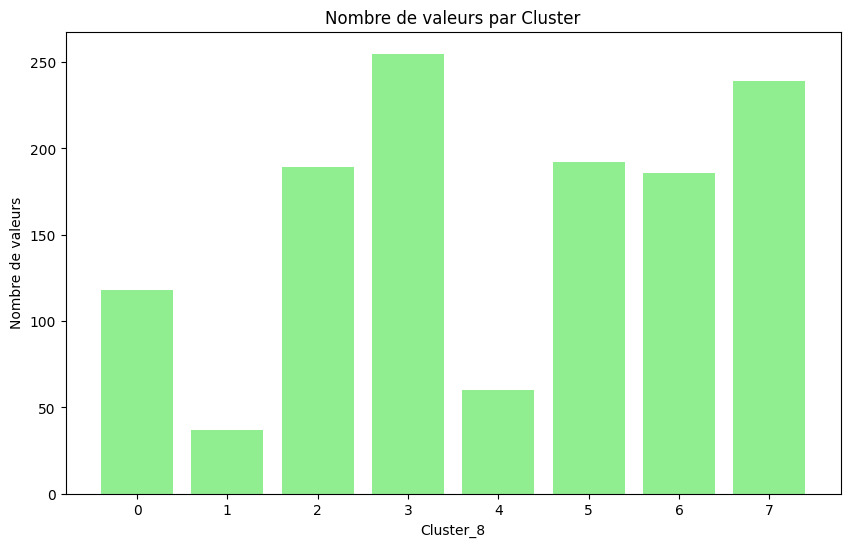

In [145]:
rep_pile_p = join_dataFrames(pile, cluster_id, 'ID_ABONNE')
liste = rep_pile_p.groupby(['Cluster_8']).count()
donnees_pile_p = pd.DataFrame(liste)
donnees_pile_p['Cluster_8'] = donnees_pile_p.index
plt.figure(figsize=(10, 6))
plt.bar(donnees_pile_p['Cluster_8'], donnees_pile_p['ID_ABONNE'], color='lightgreen')
plt.xlabel('Cluster_8')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par Cluster')
plt.xticks(donnees_pile_p['Cluster_8'])
plt.show()


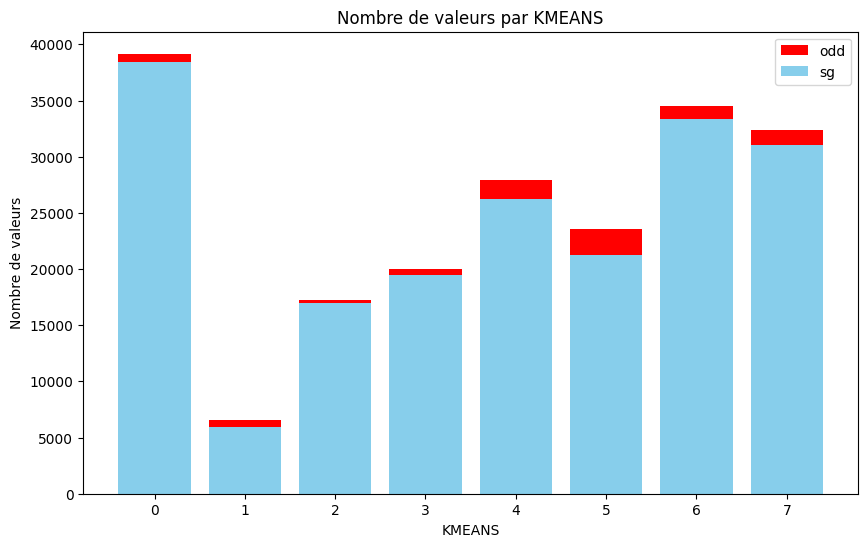

In [150]:
plt.figure(figsize=(10, 6))
plt.bar(donnees_odd['KMEANS'], donnees_odd['ID_ABONNE'], color='red', label='odd')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_odd['KMEANS'])

plt.bar(donnees_sg['KMEANS'], donnees_sg['ID_ABONNE'], color='skyblue', label='sg')
plt.legend()

plt.show()

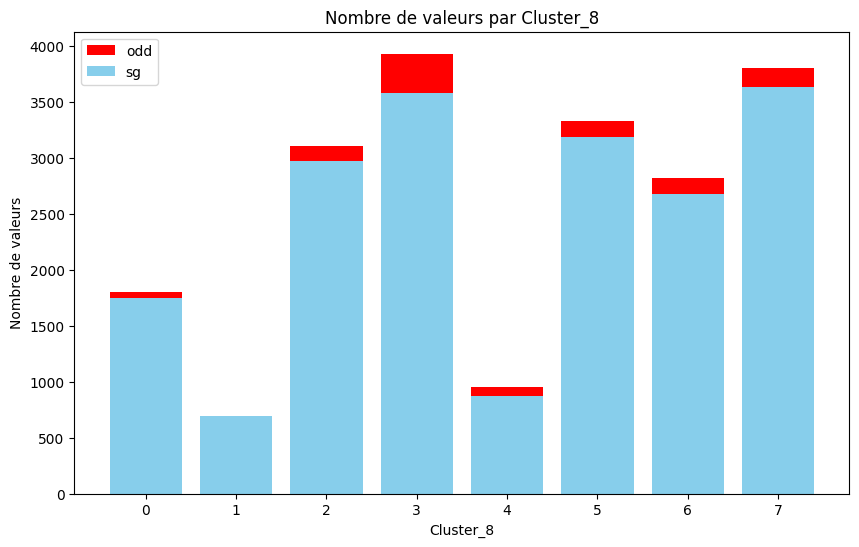

In [152]:
plt.figure(figsize=(10, 6))
plt.bar(donnees_odd_p['Cluster_8'], donnees_odd_p['ID_ABONNE'], color='red', label='odd')
plt.xlabel('Cluster_8')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par Cluster_8')
plt.xticks(donnees_odd_p['Cluster_8'])
plt.bar(donnees_sg_p['Cluster_8'], donnees_sg_p['ID_ABONNE'], color='skyblue', label='sg')
plt.legend()

plt.show()

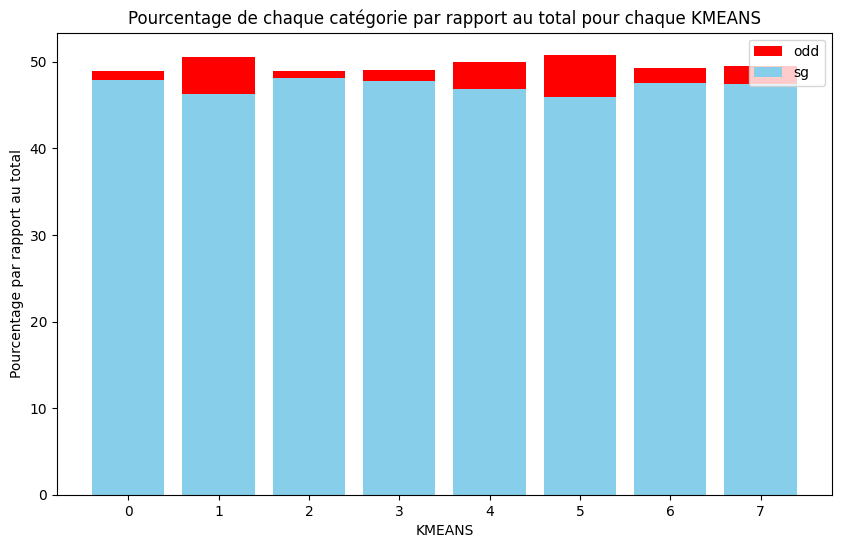

In [153]:
total_par_kmeans = donnees_odd['ID_ABONNE'] + donnees_sg['ID_ABONNE'] + donnees_pile['ID_ABONNE']

pourcentage_odd = (donnees_odd['ID_ABONNE'] / total_par_kmeans) * 100
pourcentage_sg = (donnees_sg['ID_ABONNE'] / total_par_kmeans) * 100

plt.figure(figsize=(10, 6))

plt.bar(donnees_odd['KMEANS'], pourcentage_odd, color='red', label='odd')
plt.bar(donnees_sg['KMEANS'], pourcentage_sg, color='skyblue', label='sg')

plt.xlabel('KMEANS')
plt.ylabel('Pourcentage par rapport au total')
plt.title('Pourcentage de chaque catégorie par rapport au total pour chaque KMEANS')
plt.xticks(donnees_odd['KMEANS'])
plt.legend()

plt.show()

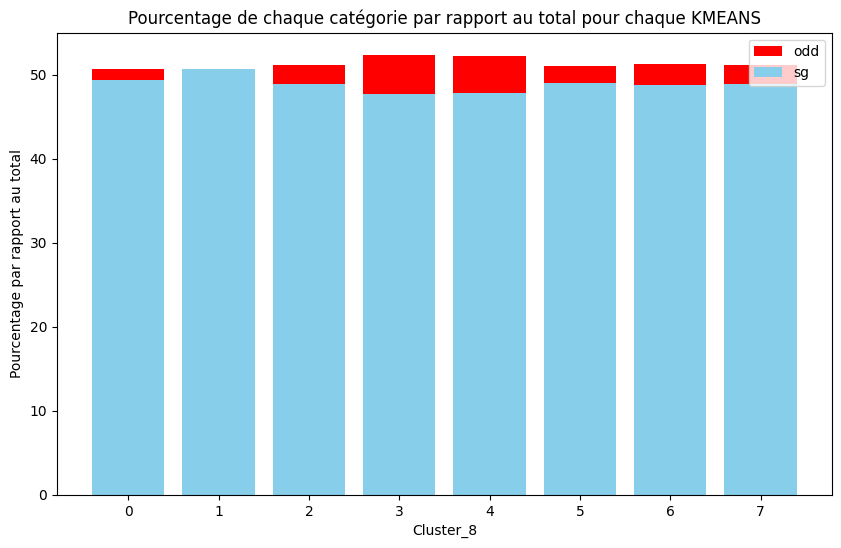

In [157]:
total_par_kmeans_p = donnees_odd_p['ID_ABONNE'] + donnees_sg_p['ID_ABONNE'] 

pourcentage_odd_p = (donnees_odd_p['ID_ABONNE'] / total_par_kmeans_p) * 100
pourcentage_sg_p = (donnees_sg_p['ID_ABONNE'] / total_par_kmeans_p) * 100

plt.figure(figsize=(10, 6))

plt.bar(donnees_odd_p['Cluster_8'], pourcentage_odd_p, color='red', label='odd')
plt.bar(donnees_sg_p['Cluster_8'], pourcentage_sg_p, color='skyblue', label='sg')

plt.xlabel('Cluster_8')
plt.ylabel('Pourcentage par rapport au total')
plt.title('Pourcentage de chaque catégorie par rapport au total pour chaque KMEANS')
plt.xticks(donnees_odd_p['Cluster_8'])
plt.legend()

plt.show()